# Solving Ordinary Differential Equations using Numerical Methods

### The following shows different numerical methods in solving ODEs

## Euler Method (1st Order)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Euler(f, x0, y, x, deltax):
    
    X = []
    Y = []
    X.append(x0)
    Y.append(y)
    
    while x0 < x:
        deltax = min(deltax, x - x0)
        y = y + deltax*f(x,y)
        x0 = x0 + deltax
        X.append(x0)
        Y.append(y)
        
    return np.array(X), np.array(Y)

### Exponential Decay

Let $N_u$ be the number of $U^{235}$ nuclei present in the sample at a time $t$:
\begin{equation}
\frac{dN_U}{dt} = - \frac{N_U}{\tau}
\end{equation}
Initial condition: $N_U = N_{U,0}$ at $t = 0$ with an exact solution $N_U(t) = N_{U,0} e^{-t/\tau}$

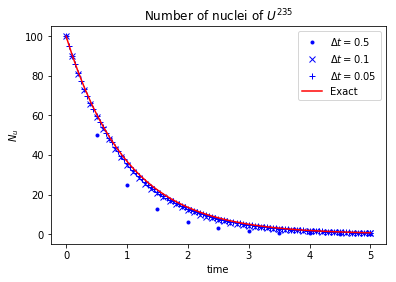

In [3]:
N = lambda t,y:  -y*tau

tau = 1
N0 = 100
t0, tf = 0, 5

deltat1 = Euler(N, x0=t0, y=N0, x=tf, deltax=0.5)
deltat2 = Euler(N, x0=t0, y=N0, x=tf, deltax=0.1)
deltat3 = Euler(N, x0=t0, y=N0, x=tf, deltax=0.05)

t1, N1 = deltat1[0], deltat1[1]
t2, N2 = deltat2[0], deltat2[1]
t3, N3 = deltat3[0], deltat3[1]

t_exact = np.linspace(0,5)
N_exact = N0*np.exp(-t_exact/tau)

plt.plot(t1,N1, 'b.', label = r'$\Delta t = 0.5$')
plt.plot(t2,N2, 'bx', label = r'$\Delta t = 0.1$')
plt.plot(t3,N3, 'b+', label = r'$\Delta t = 0.05$')
plt.plot(t_exact, N_exact, 'r', label = 'Exact')
plt.legend()
plt.xlabel('time')
plt.ylabel(r'$N_u$')
plt.title('Number of nuclei of $U^{235}$')
plt.show()

### Linear Motion with Air Drag

It is often the case that the frictional force on an object will increase as the object moves faster. An example is the motion of a falling parachutist; the role of the parachute is to produce a frictional force due to air drag, which is larger than would normally be the case without the parachute. Assume that the velocity of the parachutist is described by the equation:
\begin{equation}
\frac{dv}{dt} = g - Cv
\end{equation}
where $g$ and $C$ are constants. The constant $g$ is the acceleration due to gravity while $C$ is a drag coefficient. Provide a way of estimating $v$ using the Euler method.

Using Euler method, we could estimate the $v$ as:
\begin{equation}
v_{n+1} = v_n + (g - Cv_n)\Delta t
\end{equation}
where $\Delta t$ is small increments of time $t$

Let $C=1$, $g=9.8$, $v_0=100$, at $t=0$ to $t=5$ and $\Delta t=0.05$

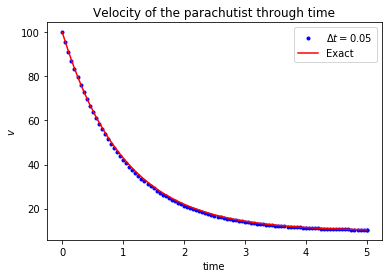

In [4]:
C = 1
g = 9.8
v0 = 100
t0, tf = 0, 5
deltat = 0.05

v = lambda t, y: g - C*y

v_deltat = Euler(v, x0=t0, y=v0, x=tf, deltax=deltat)
t, v = v_deltat[0], v_deltat[1]

vexact = np.exp(-C*t)*(v0*C-g+g*np.exp(C*t))/C

plt.plot(t, v, 'b.', label = r'$\Delta t = 0.05$')
plt.plot(t, vexact, 'r', label = 'Exact')
plt.legend()
plt.xlabel('time')
plt.ylabel('$v$')
plt.title('Velocity of the parachutist through time')
plt.show()

## Euler Method (2nd Order)

In [5]:
def Euler2nd(f, t0, tf, y0, v0, dt, Cromer= 'False'):
    
    t = np.arange(t0, tf+dt, dt)
    n = len(t)
    
    y = np.zeros(n)
    v = np.zeros(n)
    
    y[0] = y0
    v[0] = v0
    
    for i in range(n-1):
        if Cromer == 'False':
            v[i+1] = v[i] + f(y[i],v[i],t)*dt
            y[i+1] = y[i] + v[i]*dt
        else:
            v[i+1] = v[i] + f(y[i],v[i],t[i])*dt
            y[i+1] = y[i] + v[i+1]*dt
    
    return t, y

### Simple Harmonic Motion

\begin{equation}
\frac{d^2y}{dt^2} = -ky
\end{equation}
where, $y_0 = 0.2$, $v_0 = 0$, $k = 1$, and $\Delta t = 0.01$

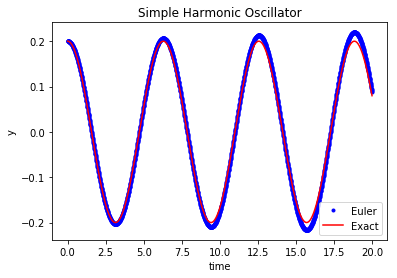

In [6]:
y0 = 0.2
v0 = 0
k = 1
dt = 0.01
tf = 20.

f = lambda y,v,t: -k*y

sol = Euler2nd(f, t0=0, tf=tf, y0=y0, v0=v0, dt=dt, Cromer= 'False')
t, y = sol[0], sol[1]

yexact = y0*np.cos(t*np.sqrt(k))

plt.plot(t, y, 'b.', label = 'Euler')
plt.plot(t, yexact, 'r', label = 'Exact')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()

## Euler-Cromer (2nd Order)

### Simple Harmonic Motion

\begin{equation}
\frac{d^2y}{dt^2} = -ky
\end{equation}
where, $y_0 = 0.2$, $v_0 = 0$, $k = 1$, and $\Delta t = 0.01$

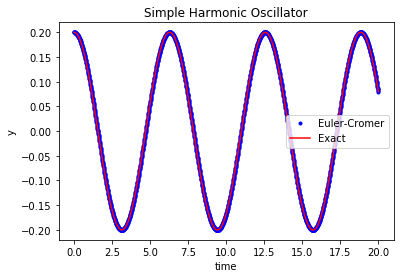

In [7]:
y0 = 0.2
v0 = 0
k = 1
dt = 0.01
tf = 20.

f = lambda y,v,t: -k*y

sol = Euler2nd(f, t0=0, tf=tf, y0=y0, v0=v0, dt=dt, Cromer= 'True')
t, y = sol[0], sol[1]

yexact = y0*np.cos(t*np.sqrt(k))

plt.plot(t, y, 'b.', label = 'Euler-Cromer')
plt.plot(t, yexact, 'r', label = 'Exact')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()

### Idealized Projectile Motion

Consider a projectile such as a shell shot from a cannon. The equations of motion of the cannon shell are obtained from Newton’s 2nd law:


\begin{equation}
\frac{d^2x}{dt^2} = 0, \frac{d^2y}{dt^2} = -g
\end{equation}

Express each of these 2nd-order ODEs as 1st-order ODEs and write down the equations for the Euler method that will approximate the motion of the cannon shell.

\begin{equation}
\frac{dx}{dt} = v, \frac{dy}{dt} = -gt + v
\end{equation}

\begin{equation}
x = x_0 + vt, y = y_0 + vt - \frac{gt^2}{2}
\end{equation}

\begin{equation}
v_{i+1} = v_i \\
x_{i+1} = x_i + v_{i+1}\Delta t
\end{equation}

\begin{equation}
v_{i+1} = v_i - g\Delta t \\
y_{i+1} = y_i + v_{i+1}\Delta t
\end{equation}

Let $g=9.8$, $v_{0x}=0.1$, $v_{0y}=10$, at $t=0$ to $t=2$ and $\Delta t=0.01$

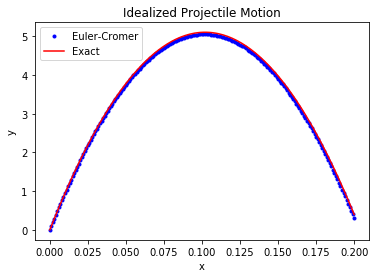

In [8]:
g = 9.8
v0x, v0y = 0.1, 10
x0, y0 = 0, 0
t0, tf = 0, 2
dt = 0.01

fx = lambda y,v,t: 0
fy = lambda y,v,t: -g

solx = Euler2nd(f=fx, t0=t0, tf=tf, y0=x0, v0=v0x, dt=dt, Cromer= 'True')
soly = Euler2nd(f=fy, t0=t0, tf=tf, y0=y0, v0=v0y, dt=dt, Cromer= 'True')
x, y = solx[1], soly[1]
t = solx[0]

xexact = v0x*t
yexact = y0 + v0y*t - 0.5*g*(t**2.)

plt.plot(x, y, 'b.', label = 'Euler-Cromer')
plt.plot(xexact, yexact, 'r', label = 'Exact')
plt.title('Idealized Projectile Motion')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Damped Harmonic Oscillator

The motion of a damped harmonic oscillator can be described using Newton’s 2nd Law:


\begin{equation}
m\frac{d^2x}{dt^2} + C\frac{dx}{dt} + kx = 0
\end{equation}

where $m$ is the mass of the oscillator, $C$ is the drag coefficient that damps the motion, and $k$ is a constant that determines the restoring force. Provide a numerical scheme that will approximate the motion of the oscillator.

Let $m=1$, $C=1$, $k=10$, $v_0=0$, $x_0=1$, at $t=0$ to $t=20$ and $\Delta t=0.01$

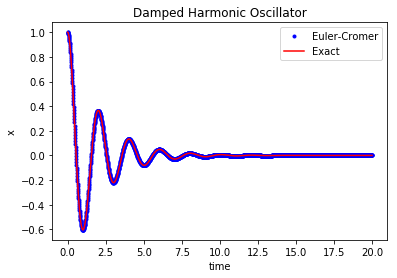

In [9]:
m = 1
C = 1
k = 10
v0 = 0
x0 = 1
t0, tf = 0, 20
dt = 0.01

f = lambda y,v,t: -((C/m)*v + (k/m)*y)

sol = Euler2nd(f, t0=t0, tf=tf, y0=x0, v0=v0, dt=dt, Cromer= 'True')
t, x = sol[0], sol[1]

xexact = (1./39.)*np.exp(-t/2.)*(39*np.cos(0.5*t*np.sqrt(39)) + \
         np.sqrt(39)*np.sin(0.5*t*np.sqrt(39))) 

plt.plot(t, x, 'b.', label = 'Euler-Cromer')
plt.plot(t, xexact, 'r', label = 'Exact')
plt.title('Damped Harmonic Oscillator')
plt.legend()
plt.xlabel('time')
plt.ylabel('x')
plt.show()

### Pendulum

Consider a pendulum of length $L$ and mass $m$ which is acted upon by a frictional force and an external driving force. Let the driving force be a sinusoidally varying force with constant amplitude $F_D$ and driving frequency $\Omega_D$. Assume that the frictional force is proportional to the pendulum’s velocity with a constant damping factor $q$. (1) Write down the differential equation that describes the motion of the damped, driven pendulum. From the differential equation, write down the equations that approximate the solution using (2) Euler-Cromer, (3) 2nd-order Runge-Kutta, and (4) Verlet algorithms.

\begin{equation}
\frac{d^2y}{dt^2} + q\frac{dy}{dt} + \frac{g}{l}\sin{y} = F_D\cos{\Omega_D}
\end{equation}

\begin{equation}
v_{i+1} = v_i + (- qv - \frac{g}{l}\sin{y} + F_D\cos{\Omega_Dt})\Delta t \\
y_{i+1} = y_i + (v_i + (- qv - \frac{g}{l}\sin{y} + F_D\cos{\Omega_Dt})\Delta t)\Delta t
\end{equation}

Let $L=1$, $Fd=0.5$, $\Omega_D=10$, $g=9.8$, $q=0.1$, $v_0=0$, $y_0=10$, at $t=0$ to $t=20$ and $\Delta t=0.005$

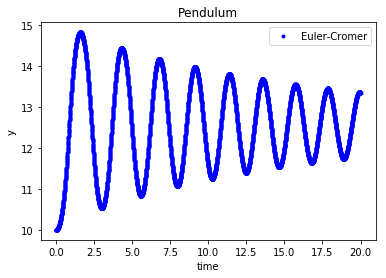

In [10]:
L = 1
Fd = 0.5
omegaD = 10
g = 9.8
q = 0.1
v0, y0 = 0, 10
t0, tf = 0, 20
dt = 0.005

f = lambda y,v,t: -q*v-(g/L)*np.sin(y)+Fd*np.cos(omegaD*t)

solEu = Euler2nd(f=f, t0=t0, tf=tf, y0=y0, v0=v0, dt=dt, Cromer= 'True')
t, y = solEu[0], solEu[1]

plt.plot(t, y, 'b.', label = 'Euler-Cromer')
plt.title('Pendulum')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()

## 2nd - Order Runge Kutta 

In [11]:
def RK2(f, t0, tf, y0, v0, dt):
    
    t = np.arange(t0, tf+dt, dt)
    n = len(t)
    
    y = np.zeros(n)
    v = np.zeros(n)
    
    y[0] = y0
    v[0] = v0
    
    for i in range(n-1):
        v[i+1] = v[i] + f(y[i],v[i],t[i])*dt
        y[i+1] = y[i] + v[i+1]*dt
    
    return t, v, y

### Linear Motion with Air Drag 

Use RK2 to approximate the motion of the falling parachutist:

\begin{equation}
\frac{dv}{dt} = g - Cv
\end{equation}

The constants are the same with the Linear Motion problem stated previously under the Euler Method section

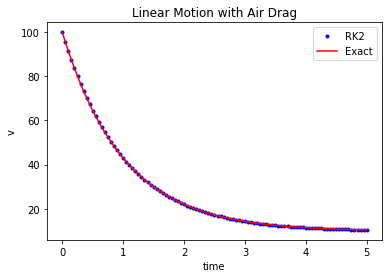

In [12]:
C = 1
g = 9.8
y0, v0 = 0, 100
t0, tf = 0, 5
dt = 0.05

f = lambda y,v,t: g-C*(v + (dt/2.)*(g-C*v))

sol = RK2(f, t0, tf, y0, v0, dt)
t, v = sol[0], sol[1]

vexact = np.exp(-C*t)*(v0*C-g+g*np.exp(C*t))/C

plt.plot(t, v, 'b.', label = 'RK2')
plt.plot(t, vexact, 'r', label = 'Exact')
plt.title('Linear Motion with Air Drag')
plt.legend()
plt.xlabel('time')
plt.ylabel('v')
plt.show()

### Damped Harmonic Oscillator

Use the RK2 method to estimate the position of the damped harmonic oscillator at any time t.

\begin{equation}
m\frac{d^2x}{dt^2} + C\frac{dx}{dt} + kx = 0
\end{equation}

The constants used are the same with the problem on the Euler-Cromer section

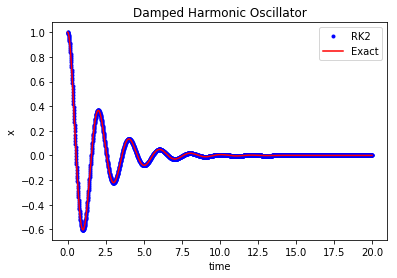

In [13]:
m = 1
C = 1
k = 10
v0 = 0
x0 = 1
t0, tf = 0, 20
dt = 0.01

f = lambda y,v,t: -((C/m)*(v - (dt/2.)*((C/m)*v + (k/m)*y)) + (k/m)*y)

sol = RK2(f=f, t0=t0, tf=tf, y0=x0, v0=v0, dt=dt)
t, x = sol[0], sol[2]

xexact = (1./39.)*np.exp(-t/2.)*(39*np.cos(0.5*t*np.sqrt(39)) + \
         np.sqrt(39)*np.sin(0.5*t*np.sqrt(39))) 

plt.plot(t, x, 'b.', label = 'RK2')
plt.plot(t, xexact, 'r', label = 'Exact')
plt.title('Damped Harmonic Oscillator')
plt.legend()
plt.xlabel('time')
plt.ylabel('x')
plt.show()

### Pendulum

Consider a pendulum of length $L$ and mass $m$ which is acted upon by a frictional force and an external driving force. Let the driving force be a sinusoidally varying force with constant amplitude $F_D$ and driving frequency $\Omega_D$. Assume that the frictional force is proportional to the pendulum’s velocity with a constant damping factor $q$. (1) Write down the differential equation that describes the motion of the damped, driven pendulum. From the differential equation, write down the equations that approximate the solution using (2) Euler-Cromer, (3) 2nd-order Runge-Kutta, and (4) Verlet algorithms.

\begin{equation}
\frac{d^2y}{dt^2} + q\frac{dy}{dt} + \frac{g}{l}\sin{y} = F_D\cos{\Omega_D}
\end{equation}

\begin{equation}
v_{i+1} = v_i + (- q(v_i + \frac{\Delta t}{2}(- qv - \frac{g}{l}\sin{y} + F_D\cos{\Omega_Dt}) ) - \frac{g}{l}\sin{y} + F_D\cos{\Omega_D(t + \frac{dt}{2}}))\Delta t \\
y_{i+1} = y_i + (v_i + (- q(v_i + \frac{\Delta t}{2}(- qv - \frac{g}{l}\sin{y} + F_D\cos{\Omega_Dt}) ) - \frac{g}{l}\sin{y} + F_D\cos{\Omega_D(t + \frac{dt}{2}}))\Delta t)\Delta t
\end{equation}

The constants used are the same as that of the Pendulum problem under the Euler-Cromer section

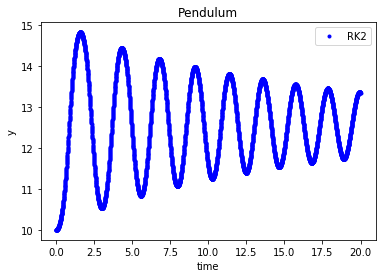

In [14]:
L = 1
Fd = 0.5
omegaD = 10
g = 9.8
q = 0.1
v0, y0 = 0, 10
t0, tf = 0, 20
dt = 0.005

f = lambda y,v,t: -q*(v + (dt/2.)*(-q*v - (g/L)*np.sin(y) + Fd*np.cos(omegaD*t))) - \
                 (g/L)*np.sin(y) + Fd*np.cos(omegaD*(t+dt/2.))

solRK = RK2(f=f, t0=t0, tf=tf, y0=y0, v0=v0, dt=dt)
t, y = solRK[0], solRK[2]

plt.plot(t, y, 'b.', label = 'RK2')
plt.title('Pendulum')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()

## Verlet Method

### Pendulum

Consider a pendulum of length $L$ and mass $m$ which is acted upon by a frictional force and an external driving force. Let the driving force be a sinusoidally varying force with constant amplitude $F_D$ and driving frequency $\Omega_D$. Assume that the frictional force is proportional to the pendulum’s velocity with a constant damping factor $q$. (1) Write down the differential equation that describes the motion of the damped, driven pendulum. From the differential equation, write down the equations that approximate the solution using (2) Euler-Cromer, (3) 2nd-order Runge-Kutta, and (4) Verlet algorithms.

\begin{equation}
\frac{d^2y}{dt^2} + q\frac{dy}{dt} + \frac{g}{l}\sin{y} = F_D\cos{\Omega_D}
\end{equation}

\begin{equation}
y_{i+1} = (2y_i - y_{i-1} + \frac{q}{2}y_{i-1}\Delta t + (-\frac{g}{l}\sin{y} + F_D\cos{\Omega_Dt})\Delta t^2)(1 - \frac{q}{2}\Delta t)
\end{equation}

The constants used are the same with the Pendulum problem under the Euler Cromer section

In [15]:
def Verlet(f1, f2, f3, t0, tf, y0, v0, dt):
    
    t = np.arange(t0, tf+dt, dt)
    n = len(t)
    
    y = np.zeros(n)
    v = np.zeros(n)
    
    v1 = v0 + f1*dt
    y1 = y0 + v0*dt
    
    y[0], y[1] = y0, y1
    v[0], v[1] = v0, v1
    
    
    for i in range(1,n-1):
        y[i+1] = (2.*y[i] - y[i-1] + f3*y[i-1]*dt + (f2(y[i],t[i]))*(dt**2))*(1. - f3*dt)
    
    return t, y

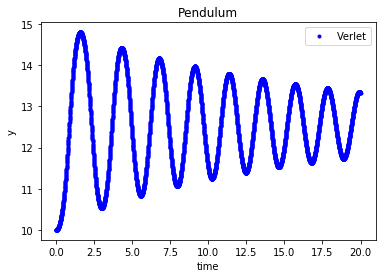

In [16]:
L = 1
Fd = 0.5
omegaD = 10
g = 9.8
q = 0.1
v0, y0 = 0, 10
t0, tf = 0, 20
dt = 0.005

f1 = (-q*v0-(g/L)*np.sin(y0)+Fd*np.cos(omegaD*t0))
f2 = lambda y, t: (-(g/L)*np.sin(y) + Fd*np.cos(omegaD*t))
f3 = q/2.

solVer = Verlet(f1, f2, f3, t0, tf, y0, v0, dt)
t, y = solVer[0], solVer[1]

plt.plot(t, y, 'b.', label = 'Verlet')
plt.title('Pendulum')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()

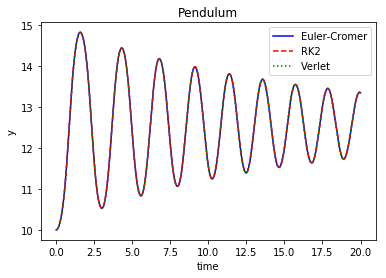

In [17]:
t1, y1 = solEu[0], solEu[1]
t2, y2 = solRK[0], solRK[2]
t3, y3 = solVer[0], solVer[1]

plt.plot(t1, y1, 'b', label = 'Euler-Cromer')
plt.plot(t2, y2, 'r--', label = 'RK2')
plt.plot(t3, y3, 'g:', label = 'Verlet')
plt.title('Pendulum')
plt.legend()
plt.xlabel('time')
plt.ylabel('y')
plt.show()